In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn
import time
import numpy as np
%matplotlib inline

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv("Coffee Tea and Beverages.csv", sep=",")

In [3]:
data.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"TE-A-ME Purify Green Tea, 100 Tea Bags | Green...",grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/71fNICQ+fJ...,https://www.amazon.in/TE-ME-Natural-Green-150g...,4.6,"1,438",₹227,₹325
1,Bevzilla 200 Gram 100% Arabica Instant Classic...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/71xwcJP81W...,https://www.amazon.in/Bevzilla-Arabica-Instant...,4.0,288,₹269,₹799
2,Tata Tea Premium | Desh Ki Chai | Unique Blend...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61z40Qqq-e...,https://www.amazon.in/Tata-Premium-Leaf-North-...,4.4,"3,991",₹243,₹255
3,"Nescafe Gold Rich and Smooth Coffee Powder, 95...",grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61H7ZKZXK+...,https://www.amazon.in/Nescafe-Gold-Smooth-Coff...,4.5,"6,445",₹445,₹520
4,Davidoff Café Espresso 57 Intense Instant Grou...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61stTyerhL...,https://www.amazon.in/Supreme-World-Davidoff-C...,4.6,"2,509",₹436,₹650


In [4]:
data.shape

(1296, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            1296 non-null   object
 1   main_category   1296 non-null   object
 2   sub_category    1296 non-null   object
 3   image           1296 non-null   object
 4   link            1296 non-null   object
 5   ratings         1136 non-null   object
 6   no_of_ratings   1136 non-null   object
 7   discount_price  949 non-null    object
 8   actual_price    1284 non-null   object
dtypes: object(9)
memory usage: 91.3+ KB


In [6]:
data.isnull().sum()

name                0
main_category       0
sub_category        0
image               0
link                0
ratings           160
no_of_ratings     160
discount_price    347
actual_price       12
dtype: int64

In [7]:
data = data.dropna(subset=['ratings', 'no_of_ratings', 'discount_price', 'actual_price'])
data.shape

(826, 9)

In [8]:
data['discount_price'] = data['discount_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)
data['actual_price'] = data['actual_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(int)

In [9]:
# Функція для перевірки та перетворення значень в числа
def to_numeric(value):
    try:
        # Видаляємо коми з чисел, що використовуються як роздільники тисяч
        value = value.replace(',', '')  
        # Перетворюємо значення на числове
        return pd.to_numeric(value, errors='raise')  
    except ValueError:
        return None 

def filter_invalid_rows(data, column_name):
    invalid_rows = data[data[column_name].apply(lambda x: to_numeric(str(x)) is None)]
    return invalid_rows

# Фільтруємо неприпустимі значення
invalid_no_of_ratings = filter_invalid_rows(data, 'no_of_ratings')
invalid_no_of_ratings

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
454,Prime Hydration Drink By Logan Paul x KSI (Blu...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61S7mxIUxw...,https://www.amazon.in/Prime-Hydration-Drink-Lo...,Get,FREE Delivery by Amazon,1799.0,2499
543,Starbuck's Blonde Roast Sunny Day Blend Lungo ...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/41mEgfix0n...,https://www.amazon.in/Starbucks-Berries-Vanill...,Get,FREE Delivery by Amazon,499.0,1199
549,Lipton Iced Tea Peach With Natural Delicious P...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61c7f9iKSK...,https://www.amazon.in/Lipton-Natural-Delicious...,Get,FREE Delivery by Amazon,1499.0,2499
585,Vokin Biotech Premium Matcha Slim Green Tea Po...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61NUO1Y5jL...,https://www.amazon.in/Vokin-Biotech-Premium-Ma...,Get,FREE Delivery by Amazon,699.0,1299
611,Fast&Up Reload electrolyte energy and hydratio...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/71ZBg-xMsF...,https://www.amazon.in/Fast-Reload-electrolyte-...,Get,FREE Delivery by Amazon,659.0,795
622,Nestle Milo Active-Go Drinks 400g (Pack of 2) ...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/41SL3k2WjH...,https://www.amazon.in/Nestle-Milo-Active-Go-Dr...,Get,Only 1 left in stock.,999.0,2360
736,Kool-Aid Zero Sugar Tropical Punch Flavored Dr...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/71CpXpZcnV...,https://www.amazon.in/Kool-Aid-Sugar-Tropical-...,Get,FREE Delivery by Amazon,597.0,950
805,"TEACURRY Belly Fat Tea (1 Month Pack, 100 Gram...",grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/612s8FYYYs...,https://www.amazon.in/Belly-Month-Pack-Grams-I...,Get,FREE Delivery by Amazon,769.0,1099
983,Redbull Plus Energy Drink 250ml Sugar Free (Pa...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/71b62QuqZq...,https://www.amazon.in/Redbull-Energy-Drink-250...,Get,FREE Delivery by Amazon,3100.0,4000
1143,DIVYNTEA Natural Loose Leaf Classic Double Ber...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/DIVYNTEA-Natural-Classic...,Get,Only 1 left in stock.,350.0,400


In [10]:
#Застосуємо функцію для перетворення на числове значення
data['no_of_ratings'] = data['no_of_ratings'].apply(to_numeric)
data['ratings'] = data['ratings'].apply(to_numeric)

# Видаляємо рядки, де є пропущені значення
data.dropna(subset=['no_of_ratings', 'ratings'], inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 1295
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            816 non-null    object 
 1   main_category   816 non-null    object 
 2   sub_category    816 non-null    object 
 3   image           816 non-null    object 
 4   link            816 non-null    object 
 5   ratings         816 non-null    float64
 6   no_of_ratings   816 non-null    float64
 7   discount_price  816 non-null    float64
 8   actual_price    816 non-null    int32  
dtypes: float64(3), int32(1), object(5)
memory usage: 60.6+ KB


In [12]:
data.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"TE-A-ME Purify Green Tea, 100 Tea Bags | Green...",grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/71fNICQ+fJ...,https://www.amazon.in/TE-ME-Natural-Green-150g...,4.6,1438.0,227.0,325
1,Bevzilla 200 Gram 100% Arabica Instant Classic...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/71xwcJP81W...,https://www.amazon.in/Bevzilla-Arabica-Instant...,4.0,288.0,269.0,799
2,Tata Tea Premium | Desh Ki Chai | Unique Blend...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61z40Qqq-e...,https://www.amazon.in/Tata-Premium-Leaf-North-...,4.4,3991.0,243.0,255
3,"Nescafe Gold Rich and Smooth Coffee Powder, 95...",grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61H7ZKZXK+...,https://www.amazon.in/Nescafe-Gold-Smooth-Coff...,4.5,6445.0,445.0,520
4,Davidoff Café Espresso 57 Intense Instant Grou...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61stTyerhL...,https://www.amazon.in/Supreme-World-Davidoff-C...,4.6,2509.0,436.0,650


In [13]:
# Формування ознаки "popular" — бінарна класифікація
# 75-й перцентиль за кількістю оцінок та 50-й за оцінками
threshold_no_of_ratings = data["no_of_ratings"].quantile(0.75)
threshold_ratings = data["ratings"].quantile(0.50)
data["popular"] = ((data["no_of_ratings"] > threshold_no_of_ratings) & (data["ratings"] > threshold_ratings)).astype(int)

In [14]:
# Формування ознаки "discount" — відсоток знижки, щоб оцінити у подальшому оцінити чи має величина знижки вплив на популярність 
data["discount"] = (((data["actual_price"]-data["discount_price"])/data["actual_price"])* 100).astype(int)

In [15]:
data['price_group'] = pd.qcut(data['actual_price'], q=4, labels=[1, 2, 3, 4]) #low, Medium, High, Premium

In [16]:
data.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,popular,discount,price_group
0,"TE-A-ME Purify Green Tea, 100 Tea Bags | Green...",grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/71fNICQ+fJ...,https://www.amazon.in/TE-ME-Natural-Green-150g...,4.6,1438.0,227.0,325,1,30,2
1,Bevzilla 200 Gram 100% Arabica Instant Classic...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/71xwcJP81W...,https://www.amazon.in/Bevzilla-Arabica-Instant...,4.0,288.0,269.0,799,0,66,3
2,Tata Tea Premium | Desh Ki Chai | Unique Blend...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61z40Qqq-e...,https://www.amazon.in/Tata-Premium-Leaf-North-...,4.4,3991.0,243.0,255,1,4,1
3,"Nescafe Gold Rich and Smooth Coffee Powder, 95...",grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61H7ZKZXK+...,https://www.amazon.in/Nescafe-Gold-Smooth-Coff...,4.5,6445.0,445.0,520,1,14,3
4,Davidoff Café Espresso 57 Intense Instant Grou...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61stTyerhL...,https://www.amazon.in/Supreme-World-Davidoff-C...,4.6,2509.0,436.0,650,1,32,3


In [17]:
data.describe()

,ratings,no_of_ratings,discount_price,actual_price,popular,discount
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,4.069975,411.105392,527.122696,713.040441,0.148284,19.159314
std,0.607170,2236.315740,535.331783,894.984943,0.355600,15.667531
min,1.000000,1.000000,8.000000,10.000000,0.000000,0.000000
25%,3.900000,7.000000,249.000000,300.000000,0.000000,6.000000
50%,4.100000,29.000000,363.495000,477.000000,0.000000,16.000000
75%,4.400000,134.250000,599.247500,799.000000,0.000000,28.000000
max,5.000000,50629.000000,6400.000000,12000.000000,1.000000,94.000000


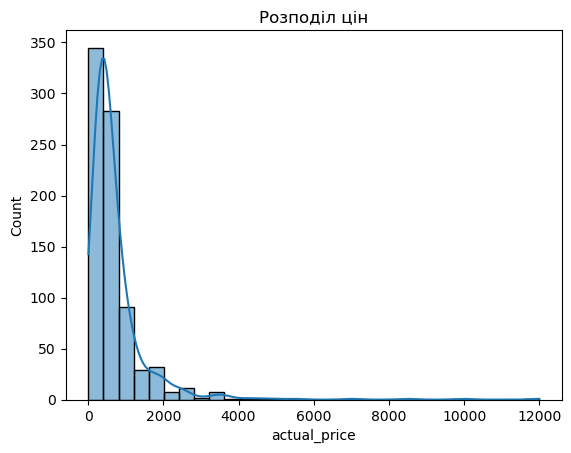

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data["actual_price"], bins=30, kde=True)
plt.title("Розподіл цін")
plt.show()

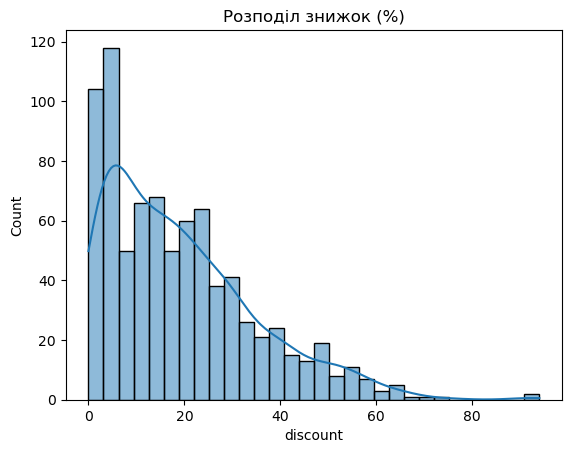

In [19]:
sns.histplot(data["discount"], bins=30, kde=True)
plt.title("Розподіл знижок (%)")
plt.show()

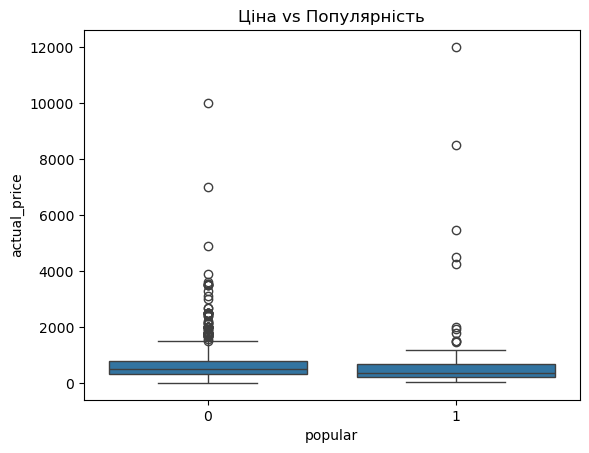

In [20]:
sns.boxplot(x="popular", y="actual_price", data=data)
plt.title("Ціна vs Популярність")
plt.show()

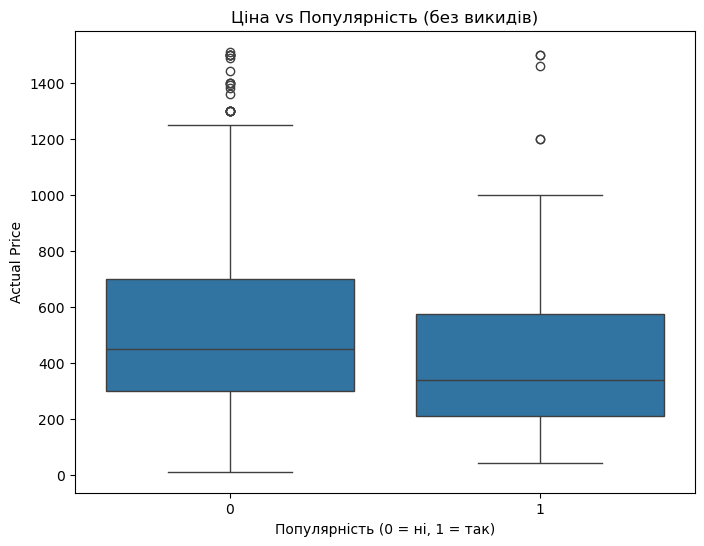

In [21]:
# Створимо копію для графіків без викидів
price_data = data.copy()

Q1 = price_data["actual_price"].quantile(0.25)
Q3 = price_data["actual_price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


price_data = price_data[(price_data["actual_price"] >= lower_bound) & (price_data["actual_price"] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(x="popular", y="actual_price", data=price_data)
plt.title("Ціна vs Популярність (без викидів)")
plt.xlabel("Популярність (0 = ні, 1 = так)")
plt.ylabel("Actual Price")
plt.show()

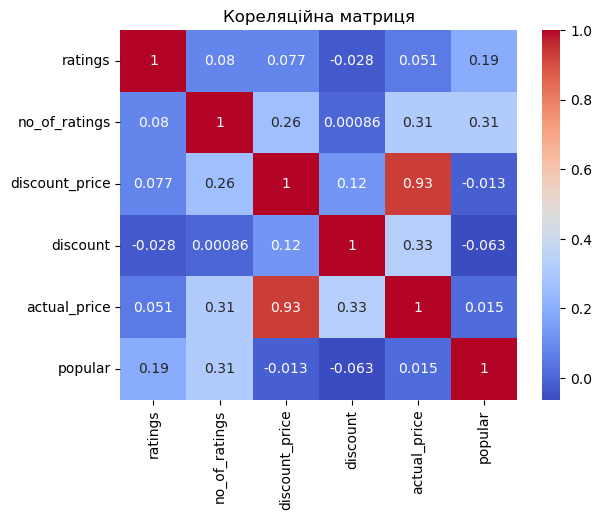

In [22]:
corr = data[["ratings", "no_of_ratings", "discount_price", "discount","actual_price", "popular"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Кореляційна матриця")
plt.show()

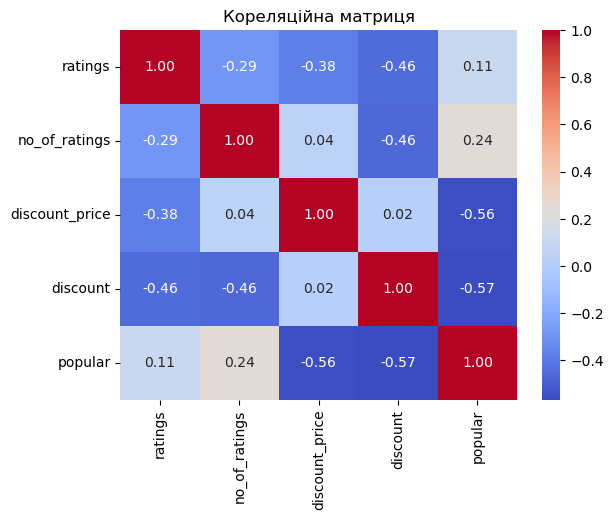

In [23]:
features = corr.drop(columns=[x for x in data.columns if 'actual_price' in x])
features_corr = features.corr()
seaborn.heatmap(data=features_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Кореляційна матриця")
plt.show()

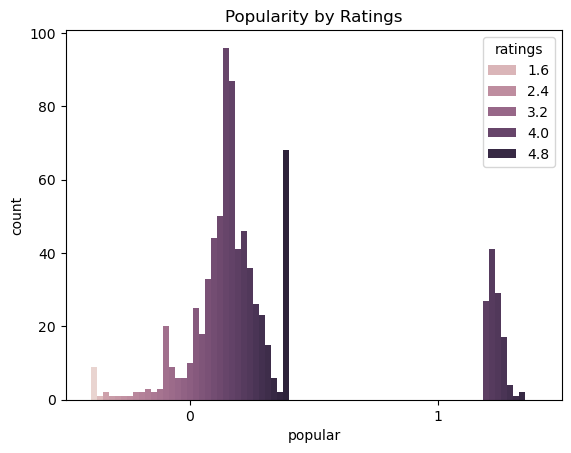

In [24]:
sns.countplot(x='popular', hue='ratings', data=data)
plt.title('Popularity by Ratings')
plt.show()

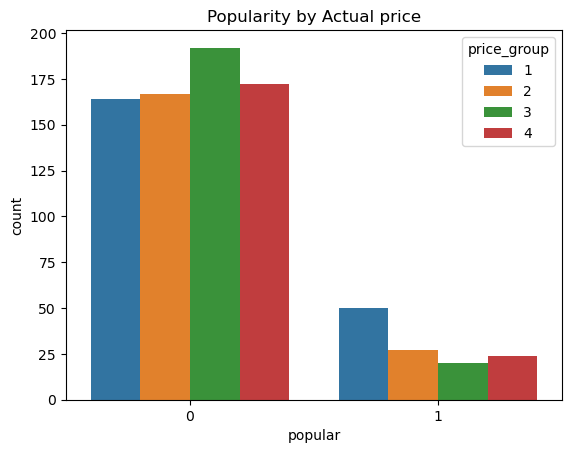

In [25]:
sns.countplot(x='popular', hue='price_group', data=data)
plt.title('Popularity by Actual price')
plt.show()

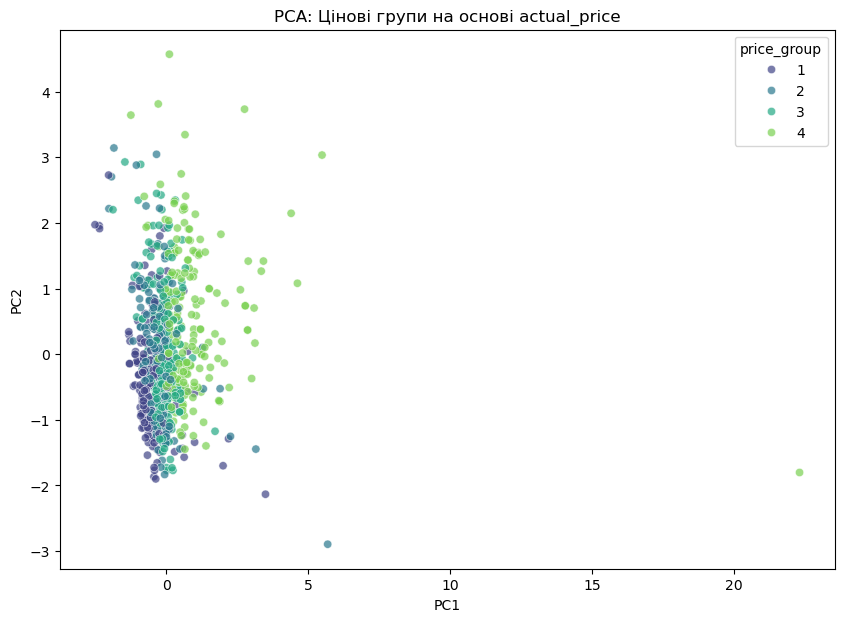

In [26]:
features = ['ratings', 'no_of_ratings', 'discount_price', 'discount']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

pca_df = data.copy()
pca_df['PC1'] = components[:, 0]
pca_df['PC2'] = components[:, 1]

plt.figure(figsize=(10,7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='price_group', palette='viridis', alpha=0.7)
plt.title('PCA: Цінові групи на основі actual_price')
plt.show()

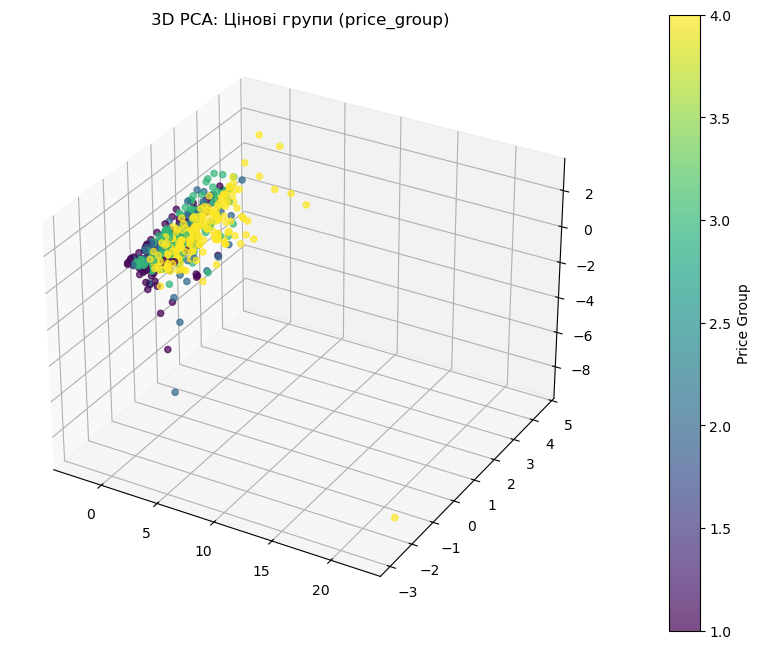

In [27]:
pca = PCA(n_components=3)
components = pca.fit_transform(X_scaled)

pca_df['PC3'] = components[:, 2]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
palette = sns.color_palette("viridis", as_cmap=True)
scatter = ax.scatter(
    pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
    c=pca_df['price_group'],
    cmap='viridis',
    alpha=0.7
)

ax.set_title('3D PCA: Цінові групи (price_group)')
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Price Group')
plt.show()

In [28]:
# Вибираємо ознаки для моделі (приведемо price_group до числового типу)
features = ['ratings', 'no_of_ratings', 'discount', 'discount_price', 'price_group']
X = data[features].copy()
X['price_group'] = X['price_group'].astype(int)
y = data['popular']

# Розділення на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    'Decision Tree': Pipeline([
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]),
    'Hist Gradient Boosting': Pipeline([
        ('classifier', HistGradientBoostingClassifier(random_state=42))
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC(probability=True, random_state=42))
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]),
    'Naive Bayes': Pipeline([
        ('classifier', GaussianNB())
    ])
}

results = {}

for name, pipeline in models.items():
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]
    
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob),
        'Training Time (s)': round(train_time, 3)
    }
    
    results[name] = metrics

results_df = pd.DataFrame(results).T.round(3)
results_df

,Accuracy,Precision,Recall,F1-score,ROC AUC,Training Time (s)
Logistic Regression,0.890,0.727,0.348,0.471,0.887,0.006
Decision Tree,0.994,1.000,0.957,0.978,0.978,0.003
Random Forest,0.982,1.000,0.870,0.930,1.000,0.177
Gradient Boosting,0.994,1.000,0.957,0.978,0.978,0.104
Hist Gradient Boosting,0.994,1.000,0.957,0.978,0.993,0.050
SVM,0.884,0.700,0.304,0.424,0.946,0.051
KNN,0.896,0.750,0.391,0.514,0.837,0.003
Naive Bayes,0.884,0.643,0.391,0.486,0.932,0.001


In [70]:
# Перевірка на перенавчання
best_model = models['Decision Tree'] 

y_train_pred = best_model.predict(X_train)
y_train_prob = best_model.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_pred)

print(f"Train Accuracy: {train_accuracy:.3f}, Test Accuracy: {test_accuracy:.3f}")
print(f"Train F1: {train_f1:.3f}, Test F1: {test_f1:.3f}")

Train Accuracy: 1.000, Test Accuracy: 0.884
Train F1: 1.000, Test F1: 0.486


In [31]:
param_grid_dt = {
    'classifier__max_depth': [3, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy']
}

pipeline_dt = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

start = time.time()
grid_search_dt = GridSearchCV(
    pipeline_dt,
    param_grid=param_grid_dt,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
grid_search_dt.fit(X_train, y_train)
duration = round(time.time() - start, 3)

best_dt = grid_search_dt.best_estimator_
y_pred = best_dt.predict(X_test)
y_prob = best_dt.predict_proba(X_test)[:, 1]

metrics_dt = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_prob),
    'Training Time (s)': duration
}
results['Decision Tree (tuned)'] = metrics_dt

print("Best parameters for Decision Tree:")
print(grid_search_dt.best_params_)


param_dist_rf = {
    'classifier__n_estimators': randint(50, 200),
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False],
    'classifier__class_weight': ['balanced', 'balanced_subsample', None]
}

pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

start = time.time()
random_search_rf = RandomizedSearchCV(
    pipeline_rf,
    param_distributions=param_dist_rf,
    n_iter=20,
    scoring='f1',
    cv=5,
    random_state=42,
    n_jobs=-1
)
random_search_rf.fit(X_train, y_train)
duration = round(time.time() - start, 3)

best_rf = random_search_rf.best_estimator_
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

metrics_rf = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_prob),
    'Training Time (s)': duration
}
results['Random Forest (tuned)'] = metrics_rf

print("\nBest parameters for Random Forest:")
print(random_search_rf.best_params_)

# Відобразити результати в таблиці
results_df = pd.DataFrame(results).T.round(3)
results_df

Best parameters for Decision Tree:
{'classifier__criterion': 'entropy', 'classifier__max_depth': 3, 'classifier__min_samples_split': 2}

Best parameters for Random Forest:
{'classifier__bootstrap': False, 'classifier__class_weight': 'balanced', 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 108}


,Accuracy,Precision,Recall,F1-score,ROC AUC,Training Time (s)
Logistic Regression,0.890,0.727,0.348,0.471,0.887,0.008
Decision Tree,0.994,1.000,0.957,0.978,0.978,0.004
Random Forest,0.982,1.000,0.870,0.930,1.000,0.128
Decision Tree (tuned),0.994,1.000,0.957,0.978,0.978,3.514
Random Forest (tuned),0.994,1.000,0.957,0.978,1.000,2.390


In [32]:
# Перевірка на перенавчання
best_model = models['Decision Tree'] 

y_train_pred = best_model.predict(X_train)
y_train_prob = best_model.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_pred)

print(f"Train Accuracy: {train_accuracy:.3f}, Test Accuracy: {test_accuracy:.3f}")
print(f"Train F1: {train_f1:.3f}, Test F1: {test_f1:.3f}")

Train Accuracy: 1.000, Test Accuracy: 0.994
Train F1: 1.000, Test F1: 0.978


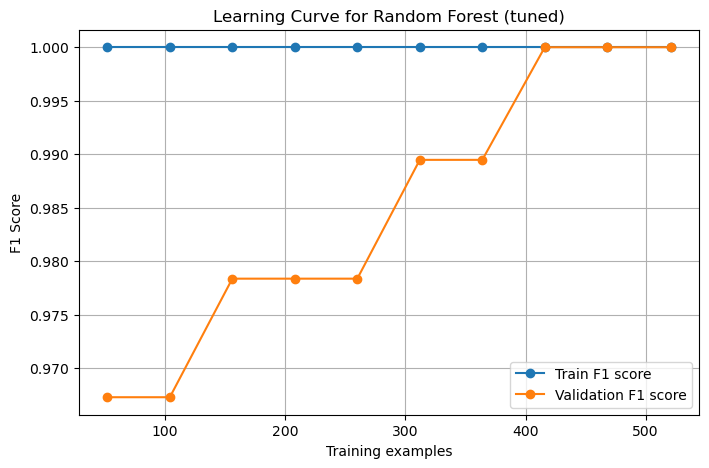

In [34]:
from sklearn.model_selection import learning_curve

model = best_dt
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Train F1 score')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Validation F1 score')
plt.xlabel("Training examples")
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.title("Learning Curve for Random Forest (tuned)")
plt.grid(True)
plt.show()


In [36]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
print(f"CV F1 mean: {cv_scores.mean():.3f}, std: {cv_scores.std():.3f}")

CV F1 mean: 1.000, std: 0.000


In [48]:
# Ініціалізація моделі з найкращими параметрами
best_dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_split=2,
    random_state=42
)

# K-fold cross-validation 
cv_f1_scores = cross_val_score(best_dt, X_train, y_train, cv=10, scoring='f1', n_jobs=-1)

print(f"F1 scores (10-fold CV): {cv_f1_scores}")
print(f"Середнє значення F1: {cv_f1_scores.mean():.3f}")
print(f"Стандартне відхилення: {cv_f1_scores.std():.3f}")

# Навчаємо модель на всьому тренувальному наборі
best_dt.fit(X_train, y_train)

# Оцінка на відкладеній тестовій вибірці (чистий набір даних)
y_test_pred = best_dt.predict(X_test)
y_test_prob = best_dt.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

test_metrics = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1-score': f1_score(y_test, y_test_pred),
    'ROC AUC': roc_auc_score(y_test, y_test_prob)
}

print("\nМетрики на тестовому наборі:")
for metric_name, metric_value in test_metrics.items():
    print(f"{metric_name}: {metric_value:.3f}")


F1 scores (10-fold CV): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Середнє значення F1: 1.000
Стандартне відхилення: 0.000

Метрики на тестовому наборі:
Accuracy: 0.994
Precision: 1.000
Recall: 0.957
F1-score: 0.978
ROC AUC: 0.978


In [50]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
f1_scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2, random_state=42)
    model.fit(X_tr, y_tr)
    y_val_pred = model.predict(X_val)
    score = f1_score(y_val, y_val_pred)
    f1_scores.append(score)

print("F1 scores for each fold:", f1_scores)
print("Mean F1:", np.mean(f1_scores))
print("Std F1:", np.std(f1_scores))

F1 scores for each fold: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mean F1: 1.0
Std F1: 0.0


F1 scores (10-fold CV): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Середнє значення F1: 1.0
Стандартне відхилення: 0.0


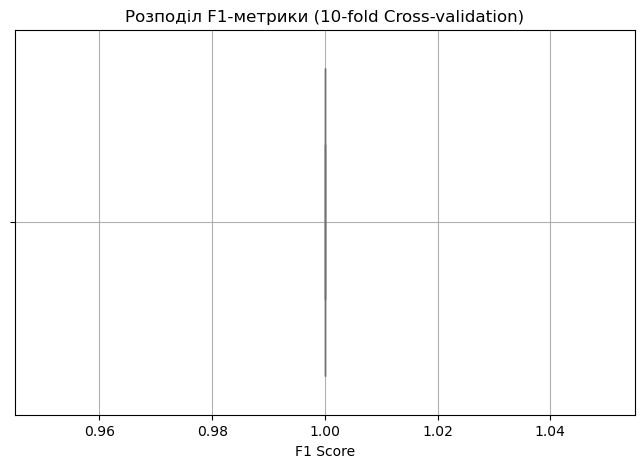

In [52]:
model = best_dt
f1_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1', n_jobs=-1)

print("F1 scores (10-fold CV):", f1_scores)
print("Середнє значення F1:", f1_scores.mean()) 
print("Стандартне відхилення:",f1_scores.std())

# Побудова boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=f1_scores, orient='h', color='skyblue')
plt.title("Розподіл F1-метрики (10-fold Cross-validation)")
plt.xlabel("F1 Score")
plt.grid(True)
plt.show()